In [1]:
import numpy as np
import imageio
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

def main():
    for folder in ['train', 'test']:
        image_path = os.path.join(os.getcwd(), ('images/' + folder))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv(('images/'+folder+'_labels.csv'), index=None)
        print('Successfully converted xml to csv.')
    
main()

Successfully converted xml to csv.
Successfully converted xml to csv.


In [3]:
train_df = pd.read_csv('images/train_labels.csv')
train_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1.jpg,1152,864,pen,338,84,743,829
1,2.jpg,1152,864,pass,234,249,934,683
2,3.jpg,1152,864,pass,12,166,724,849
3,3.jpg,1152,864,pen,697,45,1112,665
4,4.jpg,1152,864,pen,125,254,1009,604
5,5.jpg,1152,864,pen,229,103,892,857
6,6.jpg,1152,864,pass,54,84,1032,864
7,7.jpg,1152,864,pass,110,12,909,619


In [5]:
df = train_df[['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'class']]
df.to_csv('annotations.csv', sep=',')

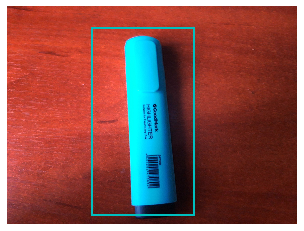

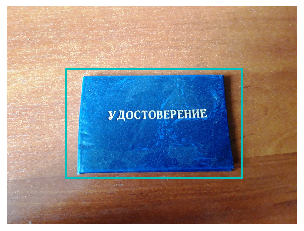

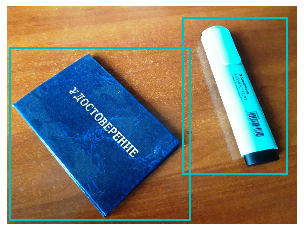

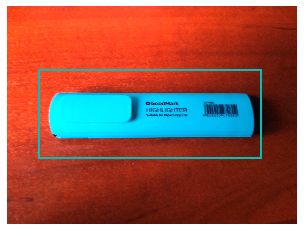

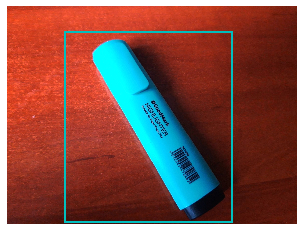

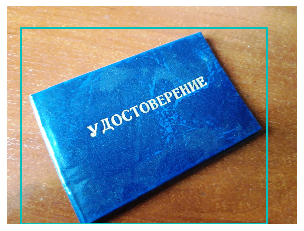

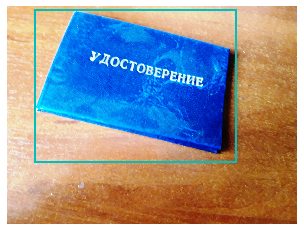

In [104]:
for img_file in glob.glob('images/train/*.jpg'):
    img = imageio.imread(img_file, pilmode='RGB')
    fig, ax = plt.subplots()
    ax.imshow(img)    
    filename = img_file[-5:]
    coords = train_df.loc[train_df['filename']==filename, \
                          ['xmin', 'ymin', 'xmax','ymax']]
    if filename != '3.jpg':
        xmin, ymin, xmax, ymax = np.ravel(coords)
        rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='c', fill=False)
        ax.add_patch(rect)
    else:
        xmin, ymin, xmax, ymax = coords.values[0]
        rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='c', fill=False)
        ax.add_patch(rect)        
        xmin, ymin, xmax, ymax = coords.values[1]
        rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='c', fill=False)
        ax.add_patch(rect)  
    plt.axis('off')
    plt.show()

In [106]:
test_df = pd.read_csv('images/test_labels.csv')
test_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,8.jpg,1152,864,pass,67,188,762,620
1,8.jpg,1152,864,pen,746,115,1067,808


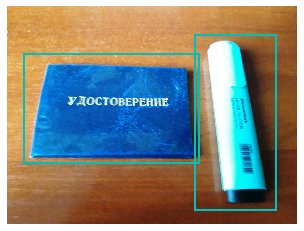

In [107]:
img_file = 'images/test/8.jpg'
img = imageio.imread(img_file, pilmode='RGB')
fig, ax = plt.subplots()
ax.imshow(img)    
filename = img_file[-5:]
coords = test_df.loc[test_df['filename']==filename, \
                     ['xmin', 'ymin', 'xmax','ymax']]
xmin, ymin, xmax, ymax = coords.values[0]
rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='c', fill=False)
ax.add_patch(rect)        
xmin, ymin, xmax, ymax = coords.values[1]
rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='c', fill=False)
ax.add_patch(rect)  
plt.axis('off')
plt.show()

In [108]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

C:\Users\TOSHIBA\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

1
